In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn.manifold import TSNE

import config
import EmbeddingWrapper

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Make sure the main directory is set correctly (if not: edit config.ini):

In [ ]:
config.MAIN_DIR

# Load in Reddit word2vec model

In [11]:
w2vec_reddit = EmbeddingWrapper.EmbeddingWrapper("word2vec", "reddit", 300)

Number of words in the vocabulary

In [12]:
print(len(w2vec_reddit.get_vocab()))

575821


In [6]:
len(f_reddit.get_vocab())

575822

# Plot words

This example is used in the introduction

In [43]:

def tsne_plot(vectors, labels, perplexity=2, text_size=35, 
              fig_size=(10,10), pdf_output_file_path=None):
    """Creates and TSNE model and plots it.
    """
    
    rc('text', usetex=True)


    tsne_model = TSNE(perplexity=perplexity, n_components=2, 
                      init='pca', n_iter=2500, random_state=123) #89
    new_values = tsne_model.fit_transform(vectors)

    # Convert to x,y values
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    # Set figure size    
    f = plt.figure(figsize=fig_size) 
    for i in range(len(x)):
        # use s=0 for no points
        plt.scatter(x[i],y[i],s=40, color='k')
        if labels[i] == 'nothing':
            labels[i] = r'\underline{nothing} '
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom', size=text_size)

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


    if pdf_output_file_path:
        f.savefig(pdf_output_file_path, bbox_inches='tight')

def tsne_plot_wordvectors(model, words, model_type, perplexity=2, 
                          text_size=35, fig_size=(10,10), pdf_output_file_path=None):
    
    # store the labels and vectors
    labels = []
    vectors = []

    for word in words:
        if model_type == "fasttext":
            vectors.append(model.get_norm_embedding(word))
        elif model_type == "word2vec":
            if word not in model.get_vocab():
                print("Skip word %s" % word)
                continue
            vectors.append(model.get_norm_embedding(word))
        else:
            raise Exception("Unknown model")
        
        labels.append(word)
    
    # plot
    tsne_plot(vectors, labels, perplexity, text_size, 
              fig_size=fig_size, pdf_output_file_path=pdf_output_file_path)

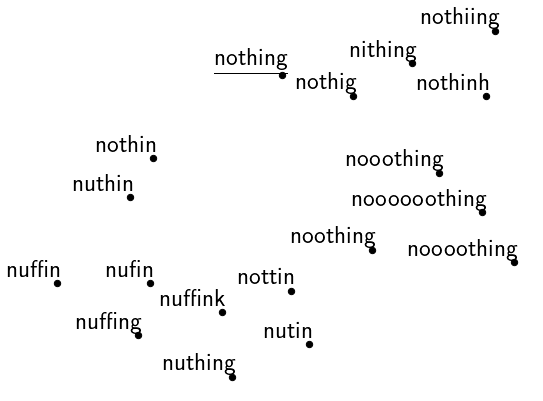

In [47]:
nothing_words = """nithing
noooooothing
noooothing
nooothing
noothing
nothig
nothiing
nothin
nothing
nothinh
nottin
nuffin
nuffing
nuffink
nufin
nuthin
nuthing
nutin"""
tsne_plot_wordvectors(w2vec_reddit,  [w for w in nothing_words.split("\n")], model_type="word2vec", 
                            perplexity=8, text_size=25, fig_size=(9,7),
                            pdf_output_file_path="word2vec_nothing_reddit.pdf")